In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)


# Reading Data
## Data source : https://www.kaggle.com/jemishdonda/headbrain

data = pd.read_csv('headbrain.csv')
print(data.shape)   # To get the size of the dataset

data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
# Collecting X and Y

X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [5]:
# Finding Mean X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)


# Using the formula to calculate b1 and b2. Basically m and c.

numer = 0  #numerator
denom = 0  #denominator


# Getting the summation for the formula

for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x )** 2
    

# Properties of the predictor straight line

b1 = numer / denom
b0 = mean_y - (b1 * mean_x )


# Printing the coeeficients
print(b1, b0)



0.26342933948939945 325.57342104944223


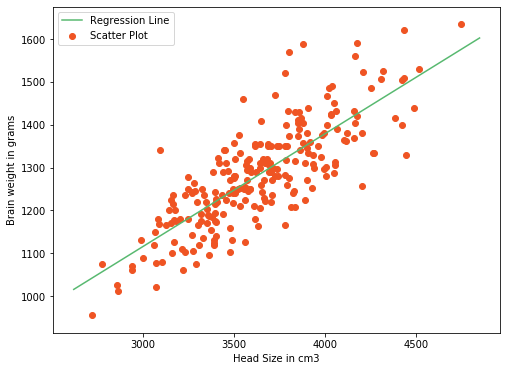

In [17]:
# Plotting values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y

## numpy.linspace(start, stop, num) > Returns evenly spaced numbers over a specified interval
x = np.linspace(min_x, max_x, 1000)

y = b0 + b1 * x

# Plotting Line
plt.plot(x, y, color='#58b970', label='Regression Line')

# Plotting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()  # The caption, places the legend inside the box by default.
plt.show()

In [20]:
# Finding how good the model is by R_sqr method (Summing the error, finding the aggregate distance)

ss_tot = 0   ## Total sum of differences
ss_res = 0   ## Sum of the errors based on individual prediction.

for i in range(m):
    y_predicted = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_predicted) ** 2
    
r2 = 1 - (ss_res / ss_tot)
print(r2)

0.6393117199570003


In [1]:
## For theoretical understanding visit: https://en.wikipedia.org/wiki/Coefficient_of_determination 
## R2 can be found using two formulae.